Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import pandas as pd
import os 

Back End

In [2]:
vertex_1 = (0, 0)
vertex_2 = (100, 0)
vertex_3 = (50, 100)

initial_tri_coords = [vertex_1, vertex_2, vertex_3]

def get_random_vertex():
    rand_index = random.randint(0, 2)
    return initial_tri_coords[rand_index]

def get_midpoint(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return [(x1 + x2) / 2, (y1 + y2) / 2]

def get_area(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2.0)
    
def inside(test_p, p1 = vertex_1, p2 = vertex_2, p3 = vertex_3):
    a = get_area(p1, p2, p3)
    a1 = get_area(p1, p2, test_p)
    a2 = get_area(p1, test_p, p3)
    a3 = get_area(test_p, p2, p3)
    return True if a == (a1 + a2 + a3) else False

def get_random_point():
    return random.uniform(0, 100), random.uniform(0, 100)

def get_start_point():
    current_point = get_random_point()
    while not inside(current_point):
        current_point = get_random_point()
    return current_point

def generate_data(num_points = 20000): 
    x_values, y_values = list(), list()
    current_point = get_start_point()
    for k in range(num_points):
        rand_vertex = get_random_vertex()
        midpoint = get_midpoint(current_point, rand_vertex)
        x_values.append(midpoint[0])
        y_values.append(midpoint[1])
        current_point = midpoint 
    return [x_values, y_values]

Front End

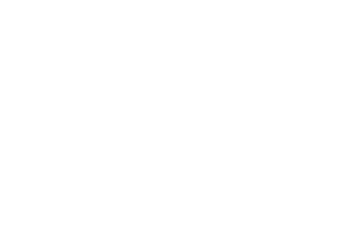

In [4]:
fig, ax = plt.subplots(frameon = False)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
scat = ax.scatter([], [])

x_values, y_values = generate_data()

def draw_frame(frame_n):
    frame_multiplier = int(len(x_values) / 100)
    index = frame_multiplier * frame_n
    coordinates = pd.DataFrame({'x' : x_values[:index], 'y' : y_values[:index]})
    scat.set_offsets(coordinates)
    scat.set_sizes([1 for j in range(len(coordinates))])
    return scat

anim = FuncAnimation(fig, draw_frame)
save_directory = os.getcwd() + "/sierpinski_triangle.mp4"
anim.save(save_directory, fps = 33, dpi = 400)